# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# additional imports if necessar

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

In [2]:
# your code here
"""
variance of Wavelet Transformed image (continuous)
skewness of Wavelet Transformed image (continuous)
curtosis of Wavelet Transformed image (continuous)
entropy of image (continuous)
class (integer)
"""
class GiniIndex():
    def __init__(self,data,feature_list) -> None:
        self.data=data
        self.feature_list=feature_list
    def pass_values(self):
        pass
    def choose_value(self):
        df=self.data;val=0.0;min_entropy=1e8;feature_name=self.feature_list[0];parent_zeroes=0;parent_ones=0

        for i in range(0,df.shape[0]):
            
        #    for j in range(df.shape[1]): 
            if(df[i][4]==0):
                parent_zeroes+=1
            else:
                parent_ones+=1
        if(parent_ones+parent_zeroes==0):
            return None,None,None,None,None
        loss_initial=1.0-((parent_zeroes/(parent_zeroes+parent_ones))*(parent_zeroes/(parent_zeroes+parent_ones))+(parent_ones/(parent_zeroes+parent_ones))*(parent_ones/(parent_zeroes+parent_ones)))
        # self.feature_list=['1']
        for data_name in self.feature_list:

            index=(ord(data_name)-ord('0'));   df[df[:, index].argsort()]

            # df[df[:, index].argsort()]
            # print(df)
            for row in range(0,df.shape[0]):

                thresh=df[row][index]
                # print(thresh)
                zeroes=0.0;ones=0.0;total_less=0.0
                for i in range(0,df.shape[0]):
                        if(df[i][index]>thresh):
                          continue
                        if(df[i][4]==0):
                            zeroes+=1
                        else:
                            ones+=1  
                        total_less+=1
                if(total_less==0):
                    continue
                gini_less=1.0-(((zeroes/total_less)*(zeroes/total_less))+((ones/total_less)*(ones/total_less)))
                zeroes=0.0;ones=0.0;total_great=0.0
                for i in range(0,df.shape[0]):
                    if(df[i][index]<=thresh):
                        continue
                    if(df[i][4]==0):
                        zeroes+=1
                    else:
                        ones+=1 
                    total_great+=1 

                if(total_great==0):
                    continue
                gini_more=1.0-(((zeroes/total_great)*(zeroes/total_great))+((ones/total_great)*(ones/total_great)))
                # print(thresh,gini_more,index)
                total=total_less+total_great
                final_gini=(gini_less*(total_less/total))+(gini_more*(total_great/total))
                
                if(final_gini<min_entropy):
                    val=thresh
                    min_entropy=final_gini 
                    feature_name=data_name          
        # print(val)
        if(loss_initial-min_entropy>0):
            pass
        else:
            return None,None,None,None,None
        # left=df[df[feature_name]<=val];right=df[df[feature_name]>val]
        left = np.array([row for row in df if row[ord(feature_name)-ord('0')]<=val])
        right = np.array([row for row in df if row[ord(feature_name)-ord('0')]>val])

        return val,feature_name,left,right,loss_initial-min_entropy

class Entropy():
    def __init__(self,data,feature_list) -> None:
        self.data=data
        self.feature_list=feature_list
  
    def calculate_entropy(self,zero,one):
        if(zero+one==0):
            return None
        p=zero/(zero+one)
        p1=one/(zero+one)
        # print(p,p1)
        return -(p*np.log2(p) +p1*np.log2(p1))
        # return np.sum(np.divide(zero,(zero+one)),*np.log2(np.divide(zero,(zero+one))),np.divide(one,(zero+one))*np.log2(np.divide(one/(zero+one))))
    def choose_value(self):
        df=self.data;val=0.0;min_entropy=0;feature_name=self.feature_list[0];parent_zeroes=0;parent_ones=0
        for i in range(0,df.shape[0]):
        #    for j in range(df.shape[1]): 
            if(df[i][4]==0):
                parent_zeroes+=1
            else:
                parent_ones+=1
        
        # loss_initial=parent_zeroes/(parent_zeroes+parent_ones)*np.log2(parent_zeroes/(parent_zeroes+parent_ones))+parent_ones/(parent_zeroes+parent_ones)*np.log2(parent_ones/(parent_zeroes+parent_ones))
        if(parent_ones==0 or parent_zeroes==0):
             return None,None,None,None,None

        loss_initial=self.calculate_entropy(parent_zeroes,parent_ones)
        if(loss_initial==None):
             return None,None,None,None,None

        # loss_initial*=-1
        # self.feature_list=['1']
        for data_name in self.feature_list:
            index=(ord(data_name)-ord('0'))
            # df[df[:, index].argsort()]
            # print(df)
            for row in range(0,df.shape[0]):

                thresh=df[row][index]
                # print(thresh)
                zeroes=0.0;ones=0.0;total_less=0.0
                for i in range(0,df.shape[0]):
                        if(df[i][index]>thresh):
                          continue
                        if(df[i][4]==0):
                            zeroes+=1
                        else:
                            ones+=1  
                        total_less+=1
                if(zeroes==0 or ones==0):
                    continue
                loss_less= self.calculate_entropy(zeroes,ones)
                # loss_less=zeroes/total_less*np.log2(zeroes/total_less)+ones/total_less*np.log2(ones/total_less)
                zeroes=0.0;ones=0.0;total_great=0.0
                for i in range(0,df.shape[0]):
                    if(df[i][index]<=thresh):
                        continue
                    if(df[i][4]==0):
                        zeroes+=1
                    else:
                        ones+=1 
                    total_great+=1 

                if(zeroes==0 or ones==0):
                    continue
                
                loss_greater= self.calculate_entropy(zeroes,ones)
                if(loss_greater==None or loss_initial==None):
                    continue
                total=total_less+total_great
                final_loss=loss_greater*(total_great/total)+loss_less*(total_less/total)
                
                if(loss_initial- final_loss>min_entropy):
                    val=thresh
                    min_entropy= loss_initial-final_loss
                    feature_name=data_name
        # print(val)
        if(loss_initial-min_entropy>0):
            pass
        else:
            return None,None,None,None,None
        # left=df[df[feature_name]<=val];right=df[df[feature_name]>val]
        left = np.array([row for row in df if row[ord(feature_name)-ord('0')]<=val])
        right = np.array([row for row in df if row[ord(feature_name)-ord('0')]>val])

        return val,feature_name,left,right,min_entropy
class LogLoss():
    def __init__(self,data,feature_list) -> None:
        self.data=data
        self.feature_list=feature_list
    def pass_values(self):
        pass
    def choose_value(self):
        df=self.data;val=0.0;min_entropy=1e8;feature_name=self.feature_list[0];parent_zeroes=0;parent_ones=0
        for i in range(0,df.shape[0]):
        #    for j in range(df.shape[1]): 
            if(df[i][4]==0):
                parent_zeroes+=1
            else:
                parent_ones+=1
        loss_initial=parent_zeroes/(parent_zeroes+parent_ones)*math.log(parent_zeroes/(parent_zeroes+parent_ones))+parent_ones/(parent_zeroes+parent_ones)*math.log(parent_ones/(parent_zeroes+parent_ones))
        loss_initial*=-1
        # self.feature_list=['1']
        for data_name in self.feature_list:
            index=(ord(data_name)-ord('0'))
            # df[df[:, index].argsort()]
            # print(df)
            for row in range(0,df.shape[0]):

                thresh=df[row][index]
                # print(thresh)
                zeroes=0.0;ones=0.0;total_less=0.0
                for i in range(0,df.shape[0]):
                        if(df[i][index]>thresh):
                          continue
                        if(df[i][4]==0):
                            zeroes+=1
                        else:
                            ones+=1  
                        total_less+=1
                if(zeroes==0 or ones==0):
                    continue
                loss_less=zeroes/total_less*math.log(zeroes/total_less)+ones/total_less*math.log(ones/total_less)
                zeroes=0.0;ones=0.0;total_great=0.0
                for i in range(0,df.shape[0]):
                    if(df[i][index]<=thresh):
                        continue
                    if(df[i][4]==0):
                        zeroes+=1
                    else:
                        ones+=1 
                    total_great+=1 

                if(zeroes==0 or ones==0):
                    continue
                
                loss_greater=zeroes/total_great*math.log(zeroes/total_great)+ones/total_great*math.log(ones/total_great)
                total=total_less+total_great
                final_loss=loss_greater*(total_great/total)+loss_less*(total_less/total)
                final_loss*=-1
                if(final_loss<min_entropy):
                    val=thresh
                    min_entropy=final_loss
                    feature_name=data_name
        # print(val)
        if(loss_initial-min_entropy>0):
            pass
        else:
            return None,None,None,None,None
        # left=df[df[feature_name]<=val];right=df[df[feature_name]>val]
        left = np.array([row for row in df if row[ord(feature_name)-ord('0')]<=val])
        right = np.array([row for row in df if row[ord(feature_name)-ord('0')]>val])

        return val,feature_name,left,right,loss_initial-min_entropy


class MSE():
    def __init__(self,data,feature_list) -> None:
        self.data=data
        self.feature_list=feature_list
    def pass_values(self):
        pass
    def choose_value(self):
        df=self.data;val=0.0;min_entropy=0.0;feature_name=self.feature_list[0];parent_zeroes=0;parent_ones=0
        for i in range(0,df.shape[0]):
        #    for j in range(df.shape[1]): 
            if(df[i][4]==0):
                parent_zeroes+=1
            else:
                parent_ones+=1
        # loss_initial=parent_zeroes/(parent_zeroes+parent_ones)*math.log2(parent_zeroes/(parent_zeroes+parent_ones))+parent_ones/(parent_zeroes+parent_ones)*math.log2(parent_ones/(parent_zeroes+parent_ones))
        # loss_initial*=-1
        misclass=1.0
        loss_initial=min(parent_ones/(parent_ones+parent_zeroes),parent_zeroes/(parent_ones+parent_zeroes))
        # if(loss_initial==0):
        #     continue
        # self.feature_list=['1']
        for data_name in self.feature_list:
            index=(ord(data_name)-ord('0'))
            # df[df[:, index].argsort()]
            # print(df)
            for row in range(0,df.shape[0]):

                thresh=df[row][index]
                # print(thresh)
                zeroes=0.0;ones=0.0;total_less=0.0
                for i in range(0,df.shape[0]):
                        if(df[i][index]>thresh):
                          continue
                        if(df[i][4]==0):
                            zeroes+=1
                        else:
                            ones+=1  
                        total_less+=1
                if(total_less==0):
                    continue
                # if(zeroes==0 or ones==0):
                #     continue
                # loss_less=zeroes/total_less*math.log2(zeroes/total_less)+ones/total_less*math.log2(ones/total_less)
                loss_less=min(zeroes/total_less,ones/total_less)
                
                zeroes=0.0;ones=0.0;total_great=0.0
                for i in range(0,df.shape[0]):
                    if(df[i][index]<=thresh):
                        continue
                    if(df[i][4]==0):
                        zeroes+=1
                    else:
                        ones+=1 
                    total_great+=1 

                # if(zeroes==0 or ones==0):
                #     continue
                if(total_great==0):
                    continue
                # loss_greater=zeroes/total_great*math.log2(zeroes/total_great)+ones/total_great*math.log2(ones/total_great)
                loss_greater=min(zeroes/total_great,ones/total_great)
                total=total_less+total_great
                
                final_loss=loss_greater*(total_great/total)+loss_less*(total_less/total)
                # final_loss*=-1
                if(loss_initial- final_loss>min_entropy):
                    val=thresh
                    min_entropy=loss_initial- final_loss
                    feature_name=data_name
        # print(val)
        if(loss_initial-min_entropy>0):
            pass
        else:
            return None,None,None,None,None
        # left=df[df[feature_name]<=val];right=df[df[feature_name]>val]
        left = np.array([row for row in df if row[ord(feature_name)-ord('0')]<=val])
        right = np.array([row for row in df if row[ord(feature_name)-ord('0')]>val])

        return val,feature_name,left,right,loss_initial-min_entropy



### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [3]:

class TreeNode():
    def __init__(self,thresh=None,left=None,right=None,depth=None,feature_index=None,feature_list=None,value=None,gain=None) -> None:
        self.impurity="Entropy"
        self.thresh=thresh
        self.left=left
        self.right=right
        self.depth=depth
        self.feature_index=feature_index
        self.feature_list=feature_list
        self.value=value
        self.gain=gain
class DecisionTree():

    def __init__(self,depth) -> None:
        self.depth=depth
        self.root=None
        pass
    
    def tree_maker(self,data,feature_list,cur_depth=0):
        if(cur_depth<=self.depth ):
            x=Entropy(data,feature_list)
            thresh,feature_name,left,right,gain=x.choose_value()
            
            if(thresh!=None):
                feat=feature_list
                # feat.remove(feature_name)                                
                left_subtree=self.tree_maker(left,feat,cur_depth+1)    
                right_subtree=self.tree_maker(right,feat,cur_depth+1)
                return TreeNode(thresh= thresh,left=left_subtree,right=right_subtree,depth=cur_depth,feature_index= feature_name,feature_list= feature_list,gain=gain)
        # else:
        leaf_value=self.calculate_leaf_node(data)
        return TreeNode(value=leaf_value)
    def calculate_leaf_node(self,df):
        zero=0;one=0
        for i in range(0,df.shape[0]):
            if(df[i][4]==0):
                zero+=1
            else:
                one+=1
        if(zero>one):
            return 0.0
        return 1.0

    def fit(self,data):
        self.root=self.tree_maker(data,feature_list=['0','1','2','3'])
        
    def print_tree(self, tree=None, indent=" "):
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print(f"X_"+str(tree.feature_index))
            print(f"Threshold",tree.thresh)
            print(f"Gain: ",tree.gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def prediction_list(self,y):
        predictions = [self.predict(x, self.root) for x in y]
        return np.asarray(predictions)
    

    def predict(self,test,tree):
        # print(test[ord[tree.feature_index]-ord['0']])
        if tree.value==None:
            if(test[ord(tree.feature_index)-ord('0')]<=tree.thresh):
                return self.predict(test,tree.left)
            else:
                return self.predict(test,tree.right)
        else:
            return tree.value
        
           

In [5]:
data = pd.read_csv('bankAuth.txt')
# data = data.to_numpy()

### Denouement


In [6]:
from sklearn.model_selection import train_test_split
# data = pd.read_csv('bankAuth.txt')
X=data
Y = data.iloc[:,-1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=41)
model=DecisionTree(depth=3)
X_train = X_train.values
X_test = X_test.values
model.fit(X_train)
model.print_tree()

X_0
Threshold 0.75896
Gain:  0.3842780590661625
 left:X_1
Threshold 5.0097
Gain:  0.24458298650578125
  left:X_0
Threshold -0.36372
Gain:  0.08906576676322198
    left:X_2
Threshold 6.7156
Gain:  0.052907022272096815
        left:1.0
        right:1.0
    right:X_2
Threshold 0.75716
Gain:  0.4906422802200053
        left:1.0
        right:0.0
  right:X_0
Threshold -4.2249
Gain:  0.7239186201258179
    left:X_0
Threshold 0.0
Gain:  0
        left:1.0
        right:1.0
    right:X_0
Threshold 0.0
Gain:  0
        left:0.0
        right:0.0
 right:X_2
Threshold -2.0267
Gain:  0.11258348709851729
  left:X_1
Threshold 4.84
Gain:  0.6695972671763946
    left:X_0
Threshold 0.0
Gain:  0
        left:1.0
        right:1.0
    right:X_0
Threshold 0.0
Gain:  0
        left:1.0
        right:0.0
  right:X_0
Threshold 0.0
Gain:  0
    left:1.0
    right:X_0
Threshold 0.0
Gain:  0
        left:1.0
        right:0.0


In [7]:

Y_pred = model.prediction_list(X_test)
# print(Y_test,Y_pred)
from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(Y_test, Y_pred))

acc=accuracy_score(Y_train,model.prediction_list(X_train))

print("Train Accuracy",acc)

Test Accuracy:  0.9672727272727273
Train Accuracy 0.9717411121239745


### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

In [8]:
from sklearn.tree import plot_tree
def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None

Decision Tree Classifier can be used for this question, the regressor model is not that good because it can be used for continuous values  whereas here we need to classify this in two classes hence we use a DecisionTreeClassifier

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [9]:
# your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.2,random_state=41)
X_train = X_train.values
X_test = X_test.values
Y_train=Y_train.values
Y_test=Y_test.values


In [10]:
sk_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
sk_model.fit(X_train,Y_train)

Y_pred = sk_model.predict(X_test)
print("Test Accuracy: ",accuracy_score(Y_test, Y_pred))

acc=accuracy_score(Y_train,sk_model.predict(X_train))
print("Train Accuracy",acc)

Test Accuracy:  0.9527272727272728
Train Accuracy 0.9544211485870556


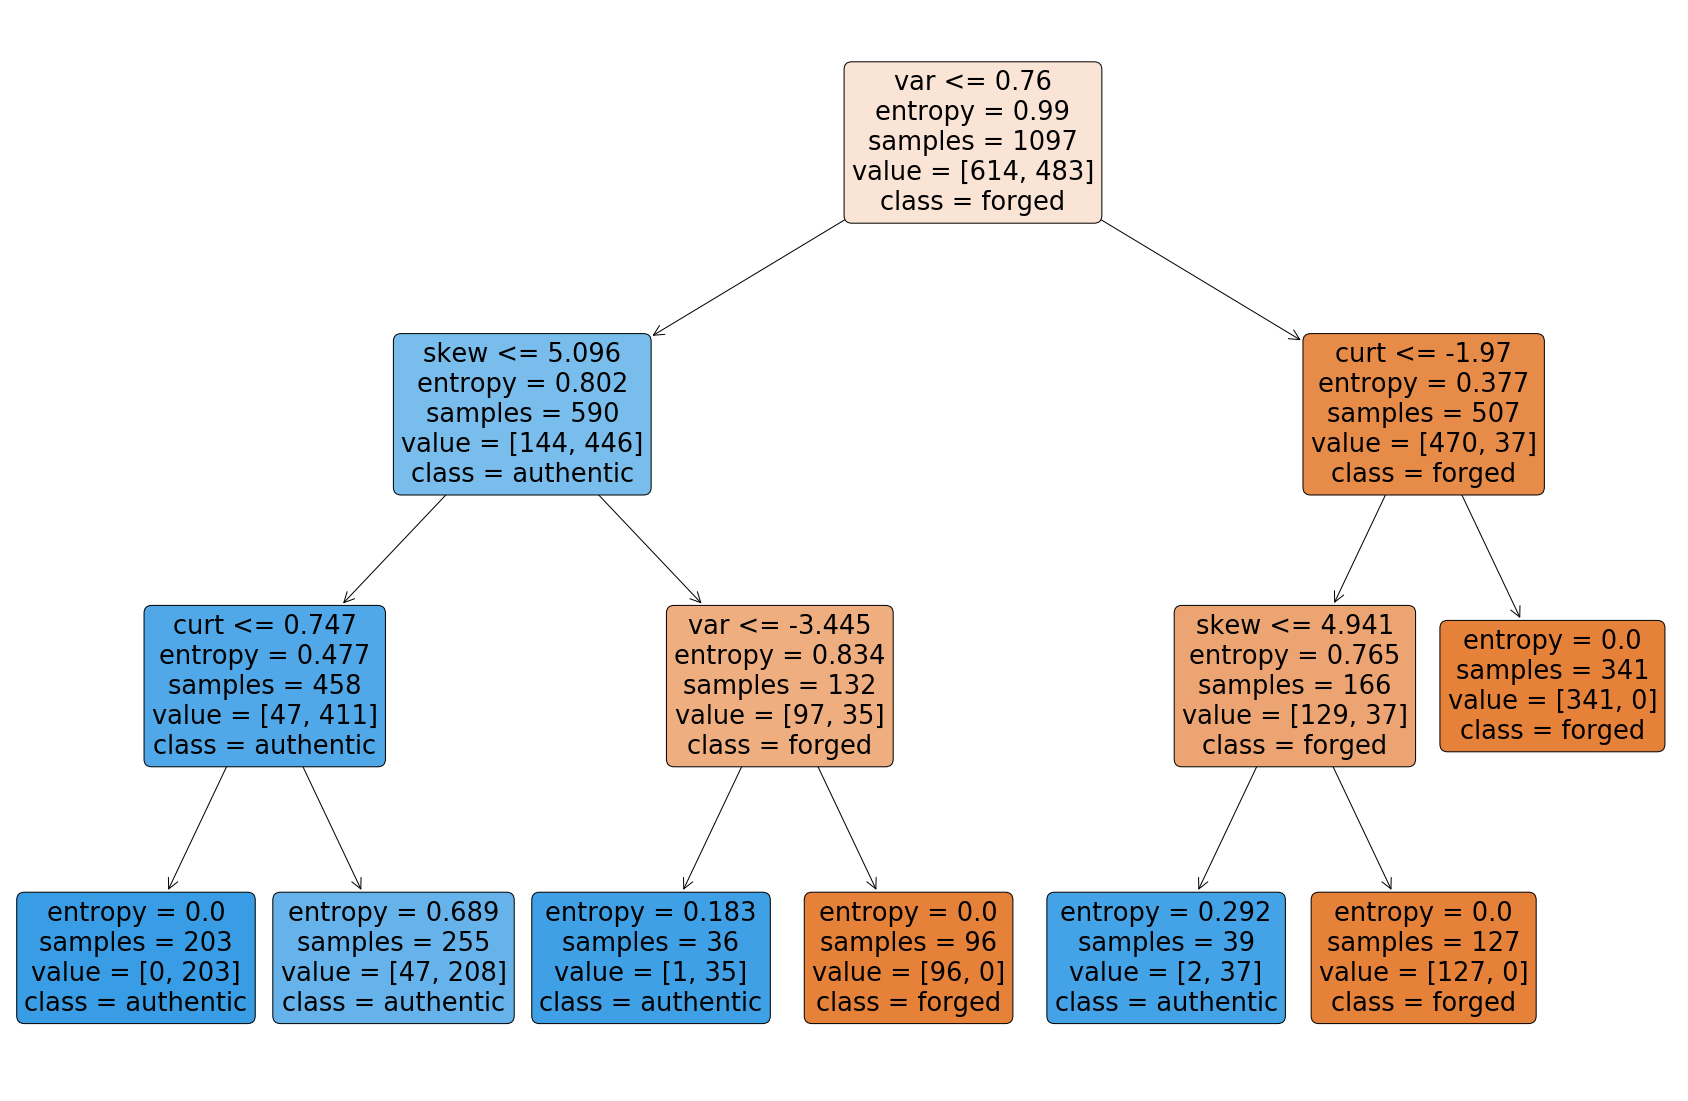

In [11]:
plotTree(sk_model)

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

#### Variation over max depth
Initially, both test and train accuracy increase with the increase in depth. After around, depth=5 the training accuracy becomes 1, and the test accuracy also starts to become static. However, it is quite obvious that our model has overfitted at this stage and there is a risk of it performing badly on some new data. There depth=3 or 4 is the ideal/optimal value for our tree.


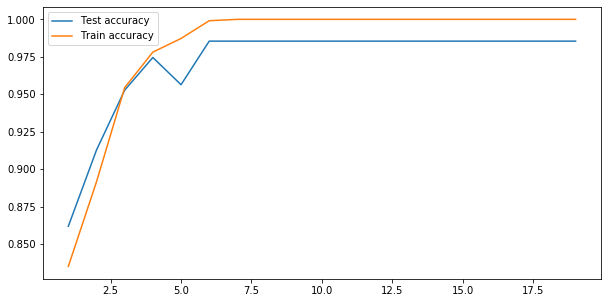

In [12]:
# max_depth_stuff
train=[];test=[]
for d in range(1,20):
    sk_model=DecisionTreeClassifier(criterion='entropy',max_depth=d)
    sk_model.fit(X_train,Y_train)
    Y_pred = sk_model.predict(X_test)
    test.append(accuracy_score(Y_test, Y_pred))
    acc=accuracy_score(Y_train,sk_model.predict(X_train))
    train.append(acc)

plt.figure(figsize=(10,5))
plt.plot(range(1,20),test,label='Test accuracy')
plt.plot(range(1,20),train,label='Train accuracy')
plt.legend()
plt.show()

#### Variation over min_samples_split

Training accuracy continuously decreases as the min_samples_split increase. For test accuracy, it remains constant for the 

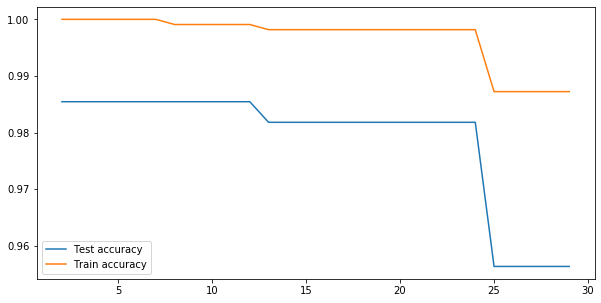

In [13]:
# min_sample_split
train=[];test=[]
for d in range(2,30):
    sk_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=d)
    sk_model.fit(X_train,Y_train)
    Y_pred = sk_model.predict(X_test)
    test.append(accuracy_score(Y_test, Y_pred))
    acc=accuracy_score(Y_train,sk_model.predict(X_train))
    train.append(acc)

plt.figure(figsize=(10,5))
plt.plot(range(2,30),test,label='Test accuracy')
plt.plot(range(2,30),train,label='Train accuracy')
plt.legend()
plt.show()

#### Variation over criterion
Entropy performs the best. On the other hand entropy performs slightly better than log_loss show the same performance, which is also to be expected as they are the same function for binary classes

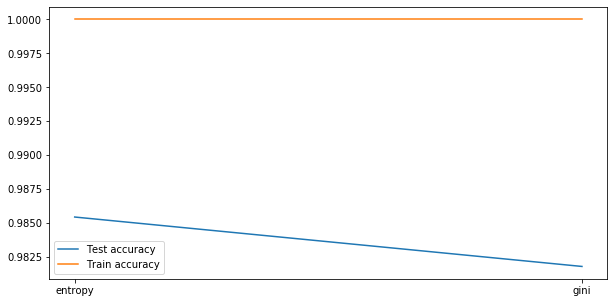

In [14]:
# Criteria test
train=[];test=[]
l=['entropy','gini']
for d in l:
    sk_model=DecisionTreeClassifier(criterion=d)
    sk_model.fit(X_train,Y_train)
    Y_pred = sk_model.predict(X_test)
    test.append(accuracy_score(Y_test, Y_pred))
    acc=accuracy_score(Y_train,sk_model.predict(X_train))
    train.append(acc)

plt.figure(figsize=(10,5))
plt.plot(l,test,label='Test accuracy')
plt.plot(l,train,label='Train accuracy')
plt.legend()
plt.show()

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

Side Note, apparently it is possible to outperform scikit learn's implementation on a pure brute force approach
Some examples are here: https://medium.com/mlearning-ai/is-a-made-from-scratch-decision-tree-better-than-sklearns-off-the-shelf-version-4ebf3499835c (Please view this in incognito tab)


Use this place to report all comparisons and wrap up the calls to the functions written above.